In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

In [67]:
soildata=pd.read_csv('/kaggle/input/olivedatairrigation/data.csv')

In [68]:
soildata.rename(columns = {'moisture':'Humidity'}, inplace = True)
soildata.rename(columns = {'temp':'Temperature'}, inplace = True)
soildata.rename(columns = {'pump':'Irrigate'}, inplace = True)
print( 'Taille(n_lignes,n_colonnes)of data frame :',soildata.shape)
soildata.head(10)

Taille(n_lignes,n_colonnes)of data frame : (200, 4)


,crop,Humidity,Temperature,Irrigate
0,olive,638,16,1
1,olive,522,18,1
2,olive,741,22,1
3,olive,798,32,1
4,olive,690,28,1
5,olive,558,23,1
6,olive,578,12,1
7,olive,673,35,1
8,olive,642,45,1
9,olive,723,11,1


In [69]:
soildata.describe()

,Humidity,Temperature,Irrigate
count,200.000000,200.000000,200.000000
mean,633.085000,27.750000,0.750000
std,279.077118,10.869602,0.434099
min,4.000000,10.000000,0.000000
25%,500.500000,18.000000,0.750000
50%,693.500000,28.000000,1.000000
75%,850.750000,38.000000,1.000000
max,1022.000000,45.000000,1.000000


In [70]:
soildata['Irrigate'].value_counts()

1    150
0     50
Name: Irrigate, dtype: int64

Text(0.5, 1.0, 'Distribution de l arrosage')

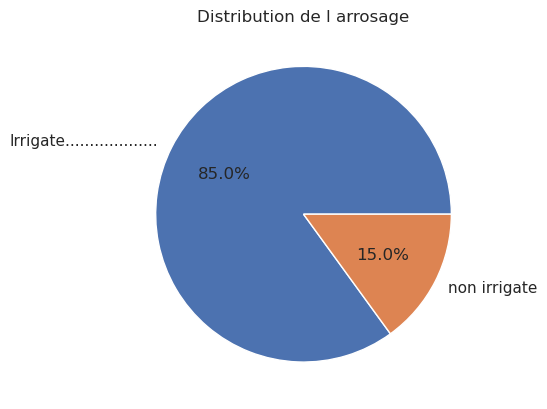

In [71]:
labels=["Irrigate...................","non irrigate"]
y=np.array([170, 30])
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.title('Distribution de l arrosage')

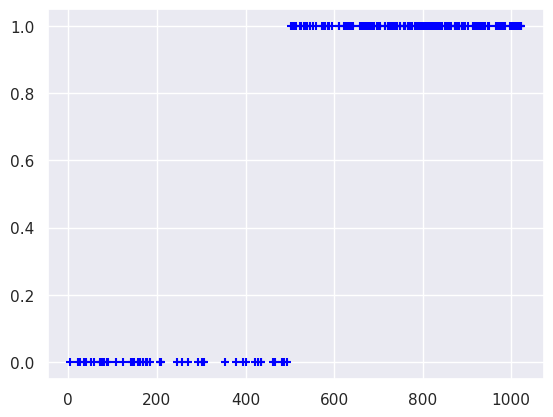

In [72]:
plt.scatter(soildata.Humidity,soildata.Irrigate,marker='+',color='blue')

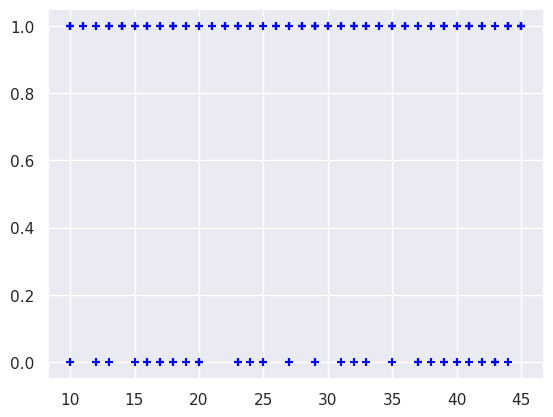

In [73]:
plt.scatter(soildata.Temperature,soildata.Irrigate,marker='+',color='blue')

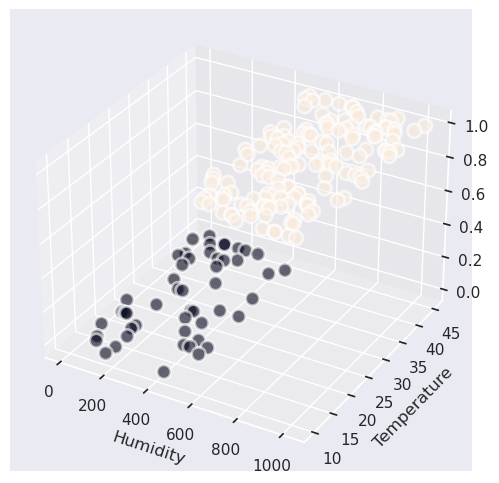

In [74]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(soildata.Humidity, soildata.Temperature, soildata.Irrigate,
           linewidths=2, alpha=.6,
           edgecolor='w',
           s = 100,
           c=soildata.Irrigate)
plt.xlabel("Humidity")
plt.ylabel("Temperature")

plt.show()

<AxesSubplot:>

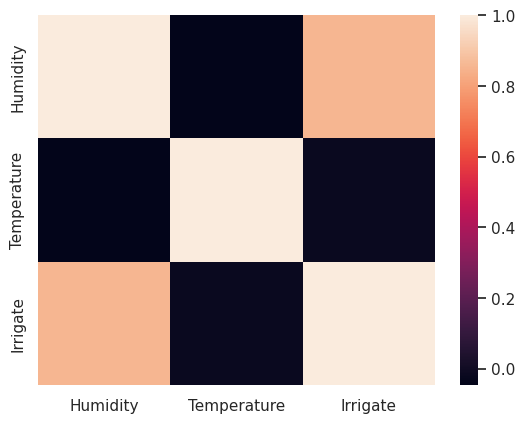

In [75]:
cormat = soildata.corr()
round(cormat,2)
sns.heatmap(cormat)

In [76]:
from sklearn.model_selection import train_test_split 

In [77]:
X = soildata.drop(['Irrigate','crop'], axis=1)
y = soildata['Irrigate']

In [78]:
X_train, X_test, y_train, y_test = train_test_split( X, y,test_size=0.3,stratify=y, random_state=42)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


In [80]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,TimeDistributed,Conv1D,Flatten
nodes = 400 #try 200 ## for LSTM
learning_rate = 0.001
n_steps = 64
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu', padding="same" , input_shape = (X_train.shape[1], 2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(256, return_sequences = True, input_shape = (X_train.shape[1], 2)))
model.add(LSTM(128,input_shape = (X_train.shape[1], 2)))
model.add(Dense(2))
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_prob=model.predict_proba(X_test)

In [81]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred), ": is the accuracy score")
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred), ": is the precision score")
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred), ": is the recall score")
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred), ": is the f1 score")

0.95 : is the accuracy score
0.9375 : is the precision score
1.0 : is the recall score
0.967741935483871 : is the f1 score


In [82]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[45  0]
 [ 3 12]]


Normalized confusion matrix
[[1.  0. ]
 [0.2 0.8]]


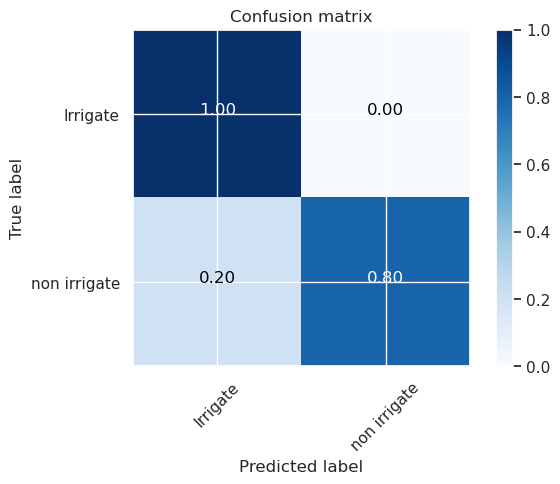

In [83]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Irrigate','non irrigate'],normalize= True,  title='Confusion matrix')

In [84]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.94      1.00      0.97        45

    accuracy                           0.95        60
   macro avg       0.97      0.90      0.93        60
weighted avg       0.95      0.95      0.95        60

